In [ ]:
import numpy as np          #Berechnung von Matrizen
import random               #Generierung zufälliger Zahlen oder anderer zufälliger Operationen
import matplotlib as plt    #Erstellung von Diagrammen
import torch                #PyTorch Bibliothek 
import torch.nn as nn
import torchvision          #Verarbeitung von Bildern
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import os
import pandas as pd
import tensorflow as tf

In [22]:
# Parameter definieren
image_folder = "train/"  # Ordner mit den Bildern
image_size = (128, 128)  # Zielgröße der Bilder

# Listen für Bilder und Labels initialisieren
images = []
labels = []

# Durch den Ordner iterieren und Bilder laden
for filename in os.listdir(image_folder):
            
    # Pfad zum Bild erstellen
    img_path = os.path.join(image_folder, filename)

    # Bild laden und auf die Zielgröße skalieren
    img = load_img(img_path, target_size=image_size)
    img_array = img_to_array(img) / 255.0  # Normalisieren auf [0, 1]

    # Bild hinzufügen
    images.append(img_array)

    # Label bestimmen (dog = 1, cat = 0)
    if "dog" in filename.lower():
        labels.append(1)
    elif "cat" in filename.lower():
        labels.append(0)


# In NumPy-Arrays umwandeln
images = np.array(images)
labels = np.array(labels)

# Daten in Trainings- und Validierungsdaten aufteilen
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Ergebnisse ausgeben
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (20000, 128, 128, 3)
y_train shape: (20000,)
x_test shape: (5000, 128, 128, 3)
y_test shape: (5000,)


In [25]:
# CNN-Modell
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),                     # Form der Eingabedaten: 128x128 Pixel, 3 Farbkanäle
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),          # 2D-Faltung zur Extraktion von Merkmalen; 32 Filter mit einer Größe von 3x3; ReLU-Aktivierungsfunktion
    tf.keras.layers.MaxPooling2D((2, 2)),                           # Dimensionsreduktion; Pooling-Größe von 2x2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),          
    tf.keras.layers.MaxPooling2D((2, 2)),   
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),         
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),                                      # Umwandlung der 2D-Ausgabe in ein 1D-Array
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid'),                  # 1 Ausgabeneuron; Sigmoid Aktivierungsfunktion 
])

# Modell kompilieren
model.compile(optimizer= 'adam',  # Optimierte Lernrate
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Trainingsstopp, sobald der Validierungsgenauigkeit beginnt zu sinken
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True)


# Training starten
EPOCHS = 20                              
history = model.fit(
    x_train, 
    y_train,  
    epochs=EPOCHS,   
    validation_data=(x_test, y_test),
    callbacks=[early_stopping],
)

Epoch 1/20
625/625 [==============================] - 100s 160ms/step - loss: 0.6451 - accuracy: 0.6063 - val_loss: 0.5575 - val_accuracy: 0.7148
Epoch 2/20
625/625 [==============================] - 99s 159ms/step - loss: 0.5459 - accuracy: 0.7224 - val_loss: 0.4802 - val_accuracy: 0.7816
Epoch 3/20
625/625 [==============================] - 99s 158ms/step - loss: 0.4666 - accuracy: 0.7819 - val_loss: 0.4459 - val_accuracy: 0.7870
Epoch 4/20
625/625 [==============================] - 100s 159ms/step - loss: 0.3954 - accuracy: 0.8226 - val_loss: 0.3997 - val_accuracy: 0.8146
Epoch 5/20
625/625 [==============================] - 98s 156ms/step - loss: 0.3457 - accuracy: 0.8493 - val_loss: 0.4288 - val_accuracy: 0.8030
Epoch 6/20
625/625 [==============================] - 97s 154ms/step - loss: 0.2947 - accuracy: 0.8734 - val_loss: 0.2716 - val_accuracy: 0.8904
Epoch 7/20
625/625 [==============================] - 97s 155ms/step - loss: 0.2581 - accuracy: 0.8901 - val_loss: 0.2527 - val_

In [26]:
model.save('CNN_model.keras')
print("Das Modell wurde erfolgreich gespeichert.")

Das Modell wurde erfolgreich gespeichert.


157/157 [==============================] - 7s 41ms/step
Test Accuracy: 0.92
Confusion Matrix:
[[2318  197]
 [ 224 2261]]
Classification Report:
              precision    recall  f1-score   support

         Cat       0.91      0.92      0.92      2515
         Dog       0.92      0.91      0.91      2485

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



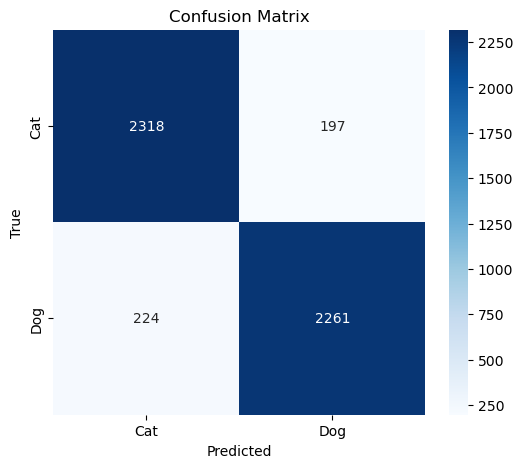

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Vorhersagen generieren
predicted_labels = model.predict(x_test).round().astype(int).flatten()

# Testgenauigkeit berechnen
test_accuracy = accuracy_score(y_test, predicted_labels)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Konfusionsmatrix berechnen
conf_matrix = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Klassifikationsbericht ausgeben
class_report = classification_report(y_test, predicted_labels, target_names=['Cat', 'Dog'])
print("Classification Report:")
print(class_report)

# Konfusionsmatrix visualisieren
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
